In [354]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [355]:
total_health_expenditure = pd.read_csv("indicator total health expenditure perc of GDP.csv")

In [356]:
govt_spending_healthcare = pd.read_csv('govt_spending_healthcare.csv')

In [357]:
private_spending_healthcare = pd.read_csv('private_spending_healthcare.csv')

In [358]:
auto_mpg = pd.read_csv('auto-mpg.csv')
auto_mpg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [359]:
def clean_gapminder_data(df, new_main_col_name=''):
    if new_main_col_name != '':
        
        df.columns.values[0] = new_main_col_name
        #print(df.columns)
        
    df = df.set_index(new_main_col_name)
    df = df.transpose().dropna(axis=1)
    #df.head()
    return df

In [360]:
total_health_exp_clean = clean_gapminder_data(total_health_expenditure, "Total Exp % GDP")

In [361]:
total_health_exp_clean.head()

Total Exp % GDP,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
1995,2.6,4.2,7.6,3.8,4.9,8.3,6.4,7.2,9.5,5.9,...,2.636129,6.830536,13.560094,11.504979,5.172931,2.439887,4.233011,5.093992,4.494404,5.600692
1996,4.0,3.8,8.0,2.2,4.6,8.0,5.8,7.4,9.5,6.2,...,2.459024,6.844214,13.497481,10.798809,5.432869,2.145018,3.493338,5.005957,4.750175,5.888799
1997,4.8,4.1,8.0,2.3,4.6,8.4,5.8,7.5,9.8,5.5,...,2.487060,6.605997,13.353005,8.404536,5.205859,3.189763,3.862412,4.857198,4.682463,6.209630
1998,5.3,4.1,9.8,1.9,4.6,8.5,5.8,7.6,9.9,5.5,...,3.055430,6.654651,13.367723,8.570228,6.425511,3.905293,4.512866,4.944168,5.399441,6.529455
1999,5.8,3.9,7.4,1.9,4.7,9.4,5.7,7.8,10.1,5.4,...,2.905245,6.889605,13.350613,8.662634,6.007693,3.524441,5.653244,4.883508,4.656680,5.795438


In [362]:
govt_health_exp_clean = clean_gapminder_data(govt_spending_healthcare, 'Govt Total Exp %')
private_health_exp_clean = clean_gapminder_data(private_spending_healthcare, 'Private Total Exp %')

In [363]:
govt_health_exp_clean.head()

Govt Total Exp %,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
1995,49.946931,75.370324,64.444444,86.822304,66.461538,59.757519,30.961018,65.776952,73.947167,23.753354,...,78.969429,83.861758,44.910957,59.562997,69.593109,76.872742,42.597392,34.508550,31.464184,60.621655
1996,39.637006,77.643102,65.227429,76.902875,64.190193,57.715201,27.891526,65.246233,73.538150,23.953395,...,79.251154,82.943013,44.970525,53.003794,68.103931,72.135660,42.436688,32.605666,43.712869,62.045300
1997,39.199387,74.354339,66.194266,77.883360,66.024759,54.455243,24.294390,66.893236,75.679708,22.385897,...,78.341206,80.357809,44.670653,41.937858,63.390118,76.756517,35.925544,33.035637,45.396049,65.284067
1998,39.543527,73.762035,72.043436,73.050980,67.953668,54.173525,28.469612,66.355802,76.011460,16.467686,...,67.313226,80.354329,43.511075,43.567572,45.826527,77.806472,32.485336,35.019893,46.805276,62.160296
1999,43.275861,72.845096,66.151939,74.199844,69.258809,55.064484,28.292598,68.389363,76.749275,18.256548,...,66.005719,80.626492,43.064551,73.352010,46.683169,74.904145,37.008850,35.160379,49.910151,49.424510


In [364]:
private_health_exp_clean.head()

Private Total Exp %,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
1995,50.053069,24.629676,35.555556,13.177696,33.538462,40.242481,69.038982,34.223048,26.052833,76.246646,...,21.030571,16.138242,55.092454,40.437003,30.406891,23.127258,57.402608,65.491450,68.535816,39.378345
1996,60.362994,22.356898,34.772571,23.097125,35.809807,42.284799,72.108474,34.753767,26.461850,76.046605,...,20.748846,17.056987,55.033055,46.996206,31.896069,27.864340,57.563312,67.394334,56.287131,37.954700
1997,60.800613,25.645661,33.805734,22.116640,33.975241,45.544757,75.705610,33.106764,24.320292,77.614103,...,21.658794,19.726200,55.329352,58.062142,36.609882,23.243483,64.074456,66.964363,54.603951,34.715933
1998,60.456473,26.237965,27.956564,26.949020,32.046332,45.826475,71.530388,33.644198,23.988540,83.532314,...,32.686774,19.730106,56.488957,56.432428,54.173473,22.193528,67.514664,64.980107,53.194724,37.839704
1999,56.724139,27.154904,33.848061,25.800156,30.741191,44.935516,71.707402,31.610637,23.250725,81.743452,...,33.994281,19.456043,56.935404,26.647990,53.316831,25.095855,62.991150,64.839621,50.089849,50.575490


## Simple Line Plots and Scatter Plots

In [365]:
def plot_single_lines(x, y, df):
    plt.plot(x, df[y], 'red')
    plt.xlabel('Year')
    plt.ylabel('Total Healthcare Expenditure as % GDP')
    plt.title(("Total Healthcare Expenditure for %s") % (y))
    plt.rcParams["figure.figsize"] = [8,7]
    plt.show()
    
def plot_scatter_chart(x, y, df):
    plt.scatter(x, df[y])
    plt.xlabel('Year')
    plt.ylabel('Total Healthcare Expenditure as % GDP')
    plt.title(("Total Healthcare Expenditure for %s") % (y))
    plt.rcParams["figure.figsize"] = [8,7]
    plt.show()

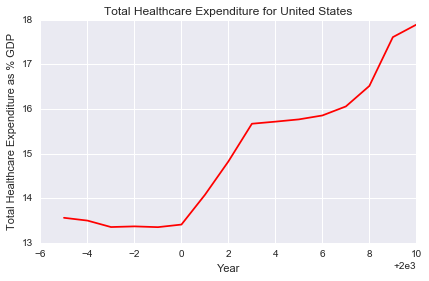

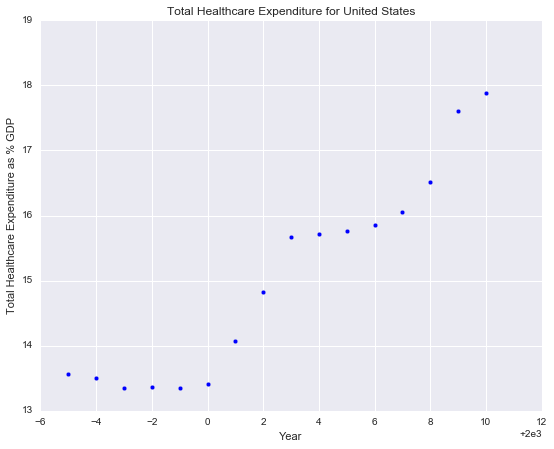

In [366]:
plot_single_lines(total_health_exp_clean.index.values, 'United States', total_health_exp_clean)
plot_scatter_chart(total_health_exp_clean.index.values, 'United States', total_health_exp_clean)

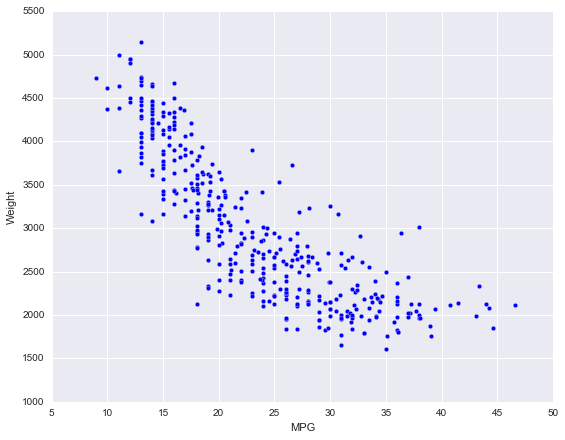

In [367]:
plt.scatter(auto_mpg['mpg'], auto_mpg['weight'])
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = [8,7]
plt.show()

## Combining Plots
#### Legends and Annotations

In [368]:
def multi_line_plot(x='', list_y='', df='', title='', xlab='', ylab='', colors=[], yl=[]):
    if len(list_y) == len(colors):
        for i in range(0, len(list_y)):
            plt.plot(x, df[list_y[i]], color=colors[i], label=list_y[i], linewidth=5, alpha=0.7)
        plt.suptitle(title, fontsize=20)
        plt.xlabel(xlab, fontsize=12)
        plt.ylabel(ylab, fontsize=12)
        plt.ylim((yl[0], yl[1]))
        plt.legend(loc='upper right', fontsize=12)
        plt.style.use('bmh')
    
        plt.rcParams["figure.figsize"] = [12,10]
        plt.show()
    else:
        print('Please Specify Colors')
    

In [369]:
#total_health_exp_clean.columns.values
#plt.style.available

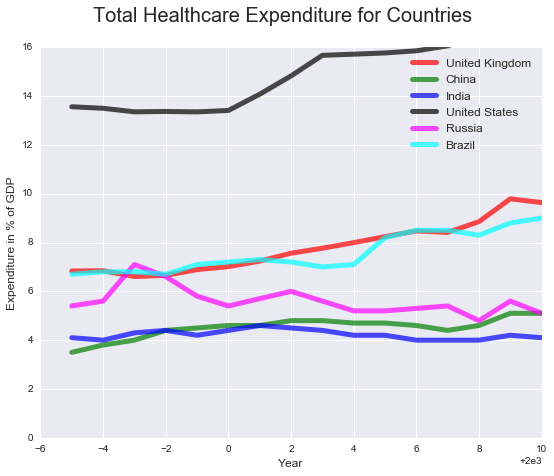

In [370]:
multi_line_plot(total_health_exp_clean.index.values, ['United Kingdom', 'China', 'India', 'United States', 'Russia', 
                                                      'Brazil'], total_health_exp_clean, 
                'Total Healthcare Expenditure for Countries', 'Year', 'Expenditure in % of GDP', 
               ['red', 'green', 'blue', 'black', 'magenta', 'cyan'], [0,16])

In [371]:
print(auto_mpg['origin'].value_counts().index.values)
#auto_mpg[auto_mpg['origin'] == 'US']['mpg']

['US' 'Asia' 'Europe']


In [372]:
def multi_scatter_plot(x='', y='', df='', colors=[], categories=[], category_column='', xlab='', ylab='', title=''):
    if len(colors) == len(categories):
        for i in range(0, len(categories)):
            temp1, temp2 = df[df[category_column] == categories[i]][x], df[df[category_column] == categories[i]][y]
            plt.scatter(temp1, temp2, color = colors[i], label=categories[i], alpha=0.5)
            
            ant_x, ant_y = temp1.values[47], temp2.values[28] #random.choice(temp1.values), random.choice(temp2.values)
            plt.annotate(categories[i], xy=(ant_x, ant_y), xytext=(ant_x+10, ant_y+200), 
                         arrowprops={'color': colors[i]})
        plt.suptitle(title, fontsize=20)
        plt.xlabel(xlab, fontsize=12)
        plt.ylabel(ylab, fontsize=12)
        plt.legend(loc='upper right', fontsize=12)
        plt.xticks()
        plt.rcParams['figure.figsize'] = [10,8]
        plt.style.use('ggplot')
        plt.show()
    else:
        print(("Colors != Categories. Please specify %s colors") % (len(categories)))

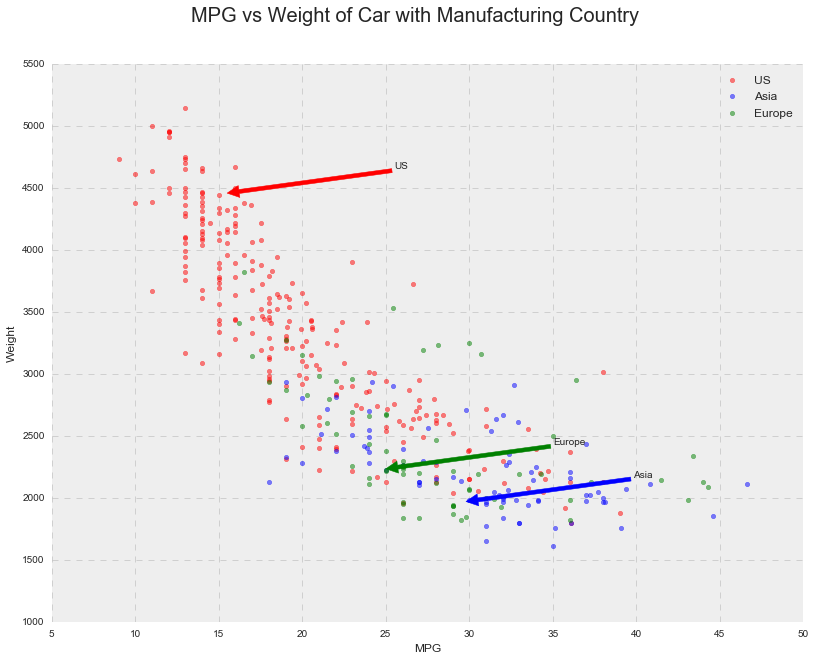

In [373]:
multi_scatter_plot('mpg', 'weight', auto_mpg, ['red', 'blue', 'green'], 
                   auto_mpg['origin'].value_counts().index.values, 'origin', 'MPG', 'Weight', 
                   'MPG vs Weight of Car with Manufacturing Country')

## Subplots

In [374]:
def multi_line_plot_subplot(x='', list_y='', df='', title='', xlab='', ylab='', colors=[], yl=[], sub=[]):
    if len(list_y) == len(colors):
        plt.subplot(sub[0], sub[1], sub[2])
        for i in range(0, len(list_y)):
            plt.plot(x, df[list_y[i]], color=colors[i], label=list_y[i], linewidth=2, alpha=0.7)
            plt.title(title)
            plt.xlabel(xlab, fontsize=12)
            plt.ylabel(ylab, fontsize=12)
            if len(yl) != 0:
                plt.ylim((yl[0], yl[1]))
            plt.style.use('bmh')
    else:
        print('Please Specify Colors')

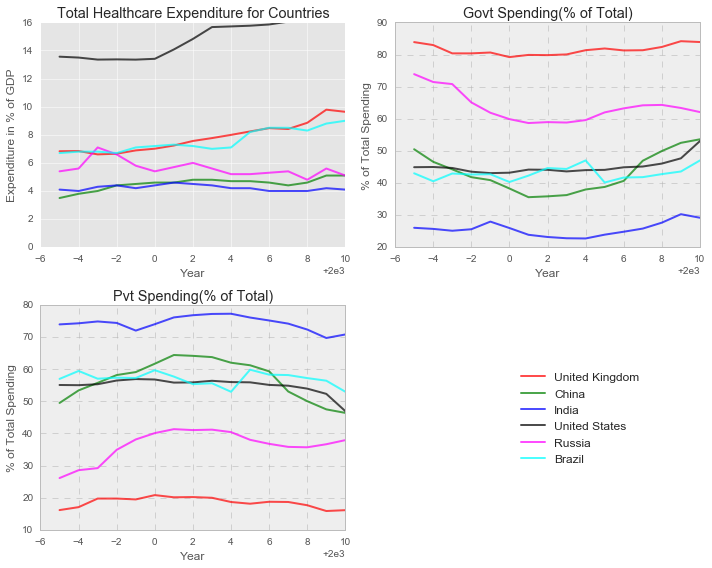

In [375]:
multi_line_plot_subplot(total_health_exp_clean.index.values, ['United Kingdom', 'China', 'India', 'United States', 
                                                              'Russia', 'Brazil'], total_health_exp_clean, 
                'Total Healthcare Expenditure for Countries', 'Year', 'Expenditure in % of GDP', 
               ['red', 'green', 'blue', 'black', 'magenta', 'cyan'], [0,16],
               [2,2,1])

multi_line_plot_subplot(govt_health_exp_clean.index.values, ['United Kingdom', 'China', 'India', 'United States', 
                                                              'Russia', 'Brazil'], govt_health_exp_clean, 
                'Govt Spending(% of Total)', 'Year', '% of Total Spending', 
               ['red', 'green', 'blue', 'black', 'magenta', 'cyan'], [],
               [2,2,2])

multi_line_plot_subplot(private_health_exp_clean.index.values, ['United Kingdom', 'China', 'India', 'United States', 
                                                              'Russia', 'Brazil'], private_health_exp_clean, 
                'Pvt Spending(% of Total)', 'Year', '% of Total Spending', 
               ['red', 'green', 'blue', 'black', 'magenta', 'cyan'], [],
               [2,2,3])

plt.legend(bbox_to_anchor=(2, 0.75), fontsize=12)
plt.tight_layout()
plt.show()

## Color Map Distribution Plots

-----------> [4 5 6] ----------->
-----------> [1 2 3] ----------->


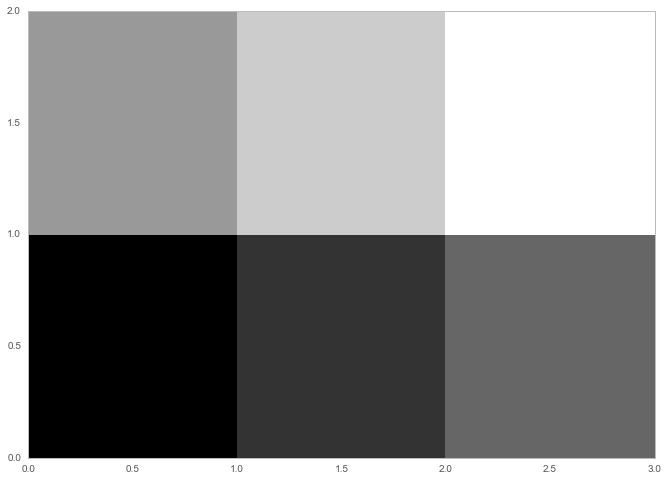

In [377]:
arr1 = np.array([[1,2,3], [4,5,6]])

print("----------->",arr1[1],"----------->")
print("----------->",arr1[0],"----------->")


plt.pcolormesh(arr1, cmap='gray')
plt.show()

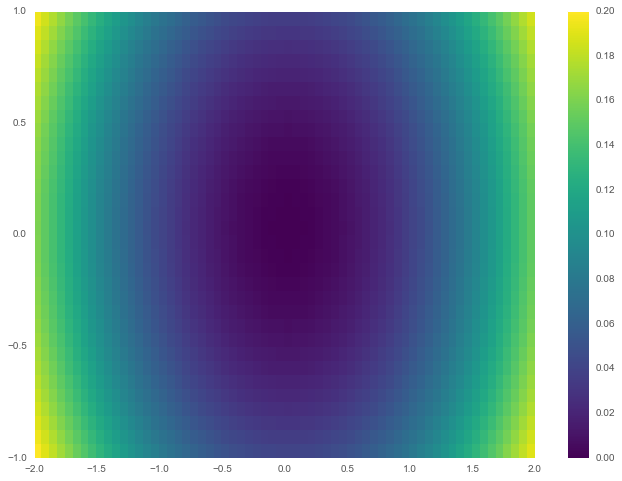

In [387]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)

X, Y = np.meshgrid(u, v)
Z = (X**2)/25 + (Y**2)/25

plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.show()

#Note: If you ever get confused with this plots print the arrays as data frame and study the plot along with the df

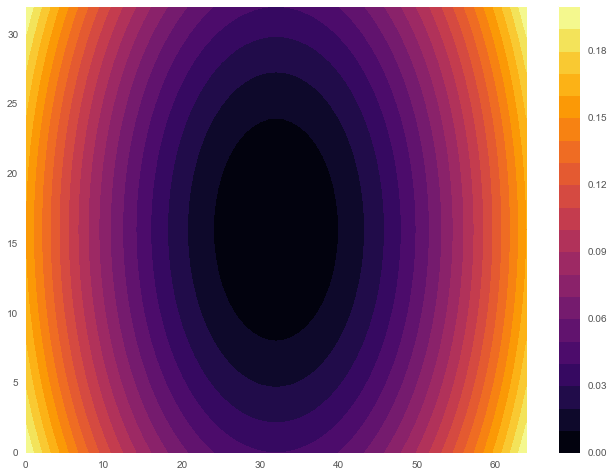

In [388]:
plt.contourf(Z, 20, cmap='inferno')
plt.colorbar()
plt.show()

#Note: If you ever get confused with this plots print the arrays as data frame and study the plot along with the df

## 1D and 2D Histograms

1D Histogram - Useful for studying frequency of single variable

In [380]:
one_d_hist_total_exp = total_health_exp_clean.T

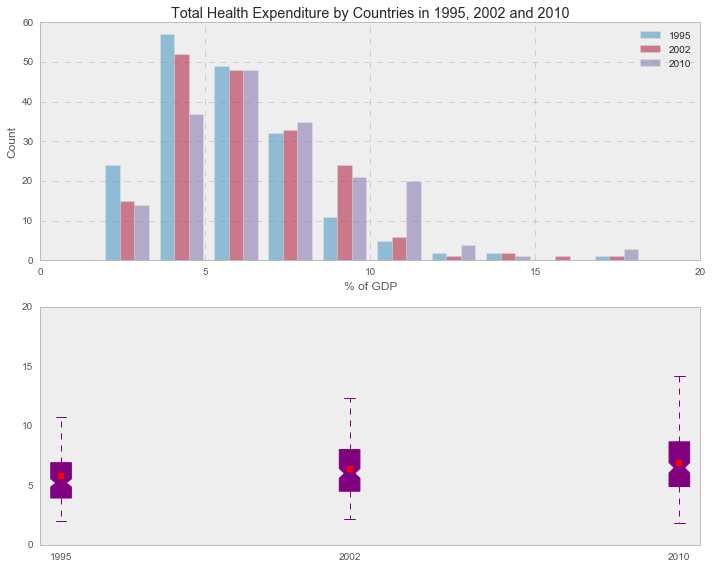

In [381]:
plt.subplot(2,1,1)
counts, bins, patches = plt.hist([one_d_hist_total_exp['1995'], one_d_hist_total_exp['2002'], 
                                  one_d_hist_total_exp['2010']], bins=10, 
                                 stacked=False, alpha=0.5, label=['1995', '2002', '2010'])
plt.title("Total Health Expenditure by Countries in 1995, 2002 and 2010")
plt.ylabel("Count")
plt.xlabel("% of GDP")
plt.legend()

plt.subplot(2,1,2)
bplot1 = plt.boxplot(one_d_hist_total_exp.iloc[:,[0,7,15]].values, vert=True, showmeans=True, patch_artist=True, 
                     notch=True, positions=[1995,2002,2010])

for i in [bplot1]:
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps', 'fliers']:
        if(item == 'fliers'):
            plt.setp(i["fliers"], markeredgecolor='purple')
        else:
            plt.setp(i[item], color='purple')
plt.grid('off')
plt.style.use('ggplot')

plt.tight_layout()
plt.show()

2D Histogram - Useful for studying distribution like color plots

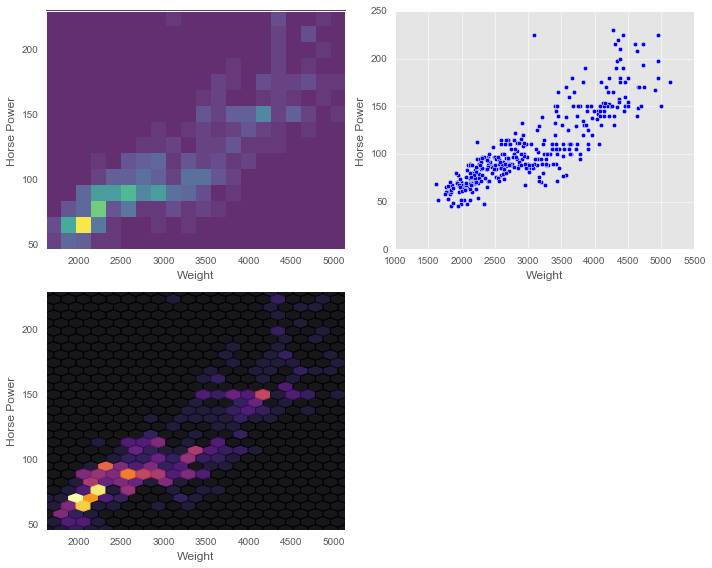

In [383]:
plt.subplot(2,2,1)
plt.hist2d(auto_mpg['weight'], auto_mpg['hp'], bins=(20,15), cmap='viridis', alpha=0.8)
plt.xlabel('Weight')
plt.ylabel('Horse Power')
plt.grid(False)

plt.subplot(2,2,2)
plt.scatter(auto_mpg['weight'], auto_mpg['hp'])
plt.xlabel('Weight')
plt.ylabel('Horse Power')

plt.subplot(2,2,3)
plt.hexbin(auto_mpg['weight'], auto_mpg['hp'], gridsize=(20,15,), cmap='inferno', alpha=0.9)
plt.xlabel('Weight')
plt.ylabel('Horse Power')
plt.axis('tight')
plt.grid(False)

plt.tight_layout()
plt.show()